In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn import metrics

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 300

# Importing Dataset

In [3]:
data = pd.read_csv("data/telecom_churn_data.csv")
data.sample(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
66664     7001758970        109             0.0             0.0   
82389     7001279376        109             0.0             0.0   
25986     7002154719        109             0.0             0.0   
17484     7000465074        109             0.0             0.0   
70778     7001110769        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
66664             0.0            6/30/2014            7/31/2014   
82389             0.0            6/30/2014            7/31/2014   
25986             0.0            6/30/2014            7/31/2014   
17484             0.0            6/30/2014            7/31/2014   
70778             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6    arpu_7    arpu_8  \
66664            8/31/2014            9/30/2014  442.108   378.251   644.928   
82389            8/31/2014            9/30/2014  649.843   434.973   838.800   
25986            8/31/2014            9/30/2014    0.000  1172.810  1332.978   
17484            8/31/2014            9/30/2014  441.866   471.111   548.172   
70778            8/31/2014            9/30/2014  121.298   295.711   244.499   

         arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
66664   438.131       232.63       222.16       300.68       204.68   
82389   690.890        38.76        90.44       169.99       140.76   
25986  1368.622          NaN        71.14        72.36       109.88   
17484   467.347        68.19        85.39       195.41       123.34   
70778   383.330         4.88        18.36        55.21        70.31   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
66664        148.49        101.93        174.71        127.89            0.0   
82389        463.64        325.93        397.23        435.56            0.0   
25986           NaN       2826.08       3211.33       3405.84            NaN   
17484        460.33        596.13        624.03        624.29            0.0   
70778         60.31        202.49        154.69        220.71            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
66664          18.59            0.0            0.0           2.35   
82389           0.00            0.0            0.0           0.00   
25986           0.00            0.0            0.0            NaN   
17484           0.00            0.0            0.0           0.00   
70778           0.00            0.0            0.0           0.00   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
66664          40.29            0.0            0.0            158.29   
82389           0.00            0.0            0.0             38.76   
25986          17.45            0.0            0.0               NaN   
17484           0.00            0.0            0.0             53.73   
70778           0.00            0.0            0.0              4.88   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
66664            107.86            228.09            154.44            117.19   
82389             85.54            149.89            127.11            445.38   
25986             71.14             72.36            102.18               NaN   
17484             27.73             53.26             24.31            139.93   
70778             18.36             55.21             70.31             60.31   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
66664             62.19            158.14             78.49              5.56   
82389            322.31            387.74            427.66             18.26   
25986            126.89            292.44            376.56               NaN   
17484             73.23             84.34             76.48              0.00   
70778            156.36             92.13            200.18             

In [4]:
data.shape

(99999, 226)

In [5]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
data_org = data.copy()

# Data Cleaning
As part of Data cleaning process the following points will be verified
- Missing value analysis
- Handling Outliers
- Fixing invalid values
- Handing data types

In [9]:
# checking the percentage of missing values in each column
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [10]:
round(100*(data.isnull().sum()/len(data)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

It is observed that the Recharge related, arpu_3g and night_pck_user columns have around 74% of the missing data.
- From the data we can say that if the recharge date, recharge amount and other recharge related informaion is missing together, we can say that the customer has not done any recharge.
- We can impute these meaningful missing values with Zero.

# Missing Value Imputation

In [111]:
data.fillna(0, inplace=True)

- We looked into all the columns with NaN values
- All the incoming mou, outgoing calls mou, recharge amount data and calls, counts and total amounts are all numerical columns.
- For all above columns, a NaN value means that customer didn't make any calls or used any data or didn't recahrge once, so we are imputing all these NaN values with zero
- For fb_user column & night_pack columns, 1 means true(enrolled) and 0 means (not enrolled). We are considering NaN value as 0(not enrolled) and replaced all NaN values with 0 for these two columns

In [110]:
#round(100*(data.isnull().sum()/len(data)), 2)

In [13]:
data.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100         0.00   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29         0.00        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91          0.00          16.23          33.49          31.64   
8        136.48        108.71 

# Filtering high value customers
- Calculate Average recharge value
- Calculate the 70th percentile of avg recharge
- Filter customers with avg rech value greater than 70th percentile calculated above

In [15]:
data['total_rech_data_val_6'] = data['av_rech_amt_data_6'] * data["total_rech_data_6"]
data["total_rech_data_val_7"] = data["av_rech_amt_data_7"] * data["total_rech_data_7"]
data["total_rech_data_val_8"] = data["av_rech_amt_data_8"] * data["total_rech_data_8"]
data["total_rech_data_val_9"] = data["av_rech_amt_data_9"] * data["total_rech_data_9"]

In [16]:
data["avg_rech_amt_good_phase"] = (data["total_rech_amt_6"] + data["total_rech_amt_7"] + data["total_rech_data_val_6"] + data["total_rech_data_val_7"]) / 2

In [17]:
data.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100         0.00   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29         0.00        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91          0.00          16.23          33.49          31.64   
8        136.48        108.71 

In [18]:
#calculating 70th percentile

filter_value = data['avg_rech_amt_good_phase'].quantile(0.7)

In [19]:
filter_value

478.0

In [20]:
data['avg_rech_amt_good_phase'].describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: avg_rech_amt_good_phase, dtype: float64

In [21]:
# shape of the data after filtering
data[data['avg_rech_amt_good_phase']>filter_value].shape

(29953, 231)

In [22]:
# filtering high value customers
data_hvc = data[data['avg_rech_amt_good_phase']>filter_value]
data_hvc = data_hvc.reset_index(drop=True)

In [23]:
data_hvc

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7000701601        109             0.0             0.0   
2         7001524846        109             0.0             0.0   
3         7002124215        109             0.0             0.0   
4         7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
29948     7000630859        109             0.0             0.0   
29949     7000661676        109             0.0             0.0   
29950     7001729035        109             0.0             0.0   
29951     7002111859        109             0.0             0.0   
29952     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
29948             0.0            6/30/2014            7/31/2014   
29949             0.0            6/30/2014            7/31/2014   
29950             0.0            6/30/2014            7/31/2014   
29951             0.0            6/30/2014            7/31/2014   
29952             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0                8/31/2014            9/30/2014   197.385   214.816   213.803   
1                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
2                8/31/2014            9/30/2014   378.721   492.223   137.362   
3                8/31/2014            9/30/2014   514.453   597.753   637.760   
4                8/31/2014            9/30/2014    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
29948            8/31/2014            9/30/2014   384.316   255.405   393.474   
29949            8/31/2014            9/30/2014   328.594   202.966   118.707   
29950            8/31/2014            9/30/2014   644.973   455.228   564.334   
29951            8/31/2014            9/30/2014   312.558   512.932   402.080   
29952            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100         0.00         0.00         0.00         0.00   
1      500.000        57.84        54.68        52.29         0.00   
2      166.787       413.69       351.03        35.08        33.46   
3      578.596       102.41       132.11        85.14       161.63   
4      811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
29948   94.080        78.68        29.04       103.24        34.38   
29949  324.143       423.99       181.83         5.71         5.03   
29950  267.451       806.73       549.36       775.41       692.63   
29951  533.502       199.89       174.46         2.46         7.16   
29952  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0              0.00          0.00          0.00          0.00           0.00   
1            453.43        567.16        325.91          0.00          16.23   
2             94.66         80.63        136.48        108.71           0.00   
3            757.93        896.68        983.39        869.89           0.00   
4             85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
29948         56.13    

# Deriving the target variable
- In this case study we are considering **Usage Based Churn** 
- The Customers who have NOT made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase are tagged as **Churn**

In [25]:
#calculating the total minutes of usage of incoming and outgoing call of churn phase
data_hvc['total_mou_churnphase'] = data_hvc['total_ic_mou_9'] + data_hvc['total_og_mou_9']

#calculating the total data usage in the churn phase
data_hvc['total_vol_churnphase'] = data_hvc['vol_2g_mb_9'] + data_hvc['vol_3g_mb_9']

In [26]:
data_hvc.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100         0.00   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        54.68        52.29         0.00        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        325.91          0.00          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0          23.74          12.59          38.06            0.0   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28              0.00   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1            308.63            447.38            162.28              0.00   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1             62.13             55.14             53.23              0.00   
2              0.00              0.00              0.00              0.00   
3              0.75              

In [27]:
#tagging the churned customers
data_hvc['churn'] = data_hvc.apply(lambda row: 1 if(row['total_mou_churnphase'] == 0 and row['total_vol_churnphase'] == 0) else 0, axis=1)

In [28]:
data_hvc.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100         0.00   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        54.68        52.29         0.00        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        325.91          0.00          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0          23.74          12.59          38.06            0.0   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28              0.00   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1            308.63            447.38            162.28              0.00   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1             62.13             55.14             53.23              0.00   
2              0.00              0.00              0.00              0.00   
3              0.75              

In [29]:
data_hvc[['total_mou_churnphase', 'total_vol_churnphase', 'churn']]

total_mou_churnphase  total_vol_churnphase  churn
0                      0.00                  0.00      1
1                      0.00                  0.00      1
2                    177.09                  0.00      0
3                   1284.14                  0.00      0
4                    255.11                328.67      0
...                     ...                   ...    ...
29948                455.84                  0.00      0
29949                163.70                955.97      0
29950               1642.35                950.62      0
29951                448.00                393.39      0
29952                  2.21               4262.81      0

[29953 rows x 3 columns]

In [30]:
#segregating churn phase column names
churn_cols = data_hvc.columns[data_hvc.columns.str.contains('_9')]

In [31]:
churn_cols

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [32]:
#droping all the columns corresponding to the churn phase
data_hvc.drop(churn_cols, axis=1, inplace=True)

In [33]:
data_hvc.shape

(29953, 179)

In [34]:
# verify that all the churn phase columns (_9) are removed
data_hvc.columns[data_hvc.columns.str.contains('_9')]

Index([], dtype='object')

In [35]:
# dropping the derived columns
data_hvc.drop(['total_mou_churnphase', 'total_vol_churnphase'], axis=1, inplace=True)

In [36]:
data_hvc.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   197.385   
1            6/30/2014            7/31/2014            8/31/2014  1069.180   
2            6/30/2014            7/31/2014            8/31/2014   378.721   
3            6/30/2014            7/31/2014            8/31/2014   514.453   
4            6/30/2014            7/31/2014            8/31/2014    74.350   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803         0.00         0.00         0.00          0.00   
1  1349.850  3171.480        57.84        54.68        52.29        453.43   
2   492.223   137.362       413.69       351.03        35.08         94.66   
3   597.753   637.760       102.41       132.11        85.14        757.93   
4   193.897   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00          0.00   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         94.09        129.74             97.93            125.94   
4 

In [37]:
data_hvc['churn'] = data_hvc['churn'].astype('category')

In [38]:
# checking class imbalance
data_hvc['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [39]:
# churn percentage
data_hvc['churn'].value_counts()[1]/len(data_hvc['churn'])*100

8.122725603445398

# Data Preparation
- Derived Variable
- EDA
- outlier Treatment
- Train test split
- Scaling

In [40]:
#data_hvc.columns.str.contains(pat="^loc.ic", regex=True)

In [112]:
# total incoming and outgoing calls(local, std and roaming)
data_hvc['total_loc_ic'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^loc.ic", regex=True)]].sum(axis=1)
data_hvc['total_std_ic'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^std.ic", regex=True)]].sum(axis=1)
data_hvc['total_roam_ic'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^roam.ic", regex=True)]].sum(axis=1)
data_hvc['total_isd_ic'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^isd.ic", regex=True)]].sum(axis=1)

data_hvc['total_ic'] = data_hvc['total_loc_ic']+data_hvc['total_std_ic']+data_hvc['total_roam_ic']+data_hvc['total_isd_ic']

In [42]:
data_hvc['total_loc_og'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^loc.og", regex=True)]].sum(axis=1)
data_hvc['total_std_og'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^std.og", regex=True)]].sum(axis=1)
data_hvc['total_roam_og'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^roam.og", regex=True)]].sum(axis=1)
data_hvc['total_isd_og'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(pat="^isd.og", regex=True)]].sum(axis=1)

data_hvc['total_og'] = data_hvc['total_loc_og']+data_hvc['total_std_og']+data_hvc['total_roam_og']+data_hvc['total_isd_og']

In [43]:
data_hvc.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   197.385   
1            6/30/2014            7/31/2014            8/31/2014  1069.180   
2            6/30/2014            7/31/2014            8/31/2014   378.721   
3            6/30/2014            7/31/2014            8/31/2014   514.453   
4            6/30/2014            7/31/2014            8/31/2014    74.350   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803         0.00         0.00         0.00          0.00   
1  1349.850  3171.480        57.84        54.68        52.29        453.43   
2   492.223   137.362       413.69       351.03        35.08         94.66   
3   597.753   637.760       102.41       132.11        85.14        757.93   
4   193.897   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00          0.00   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         94.09        129.74             97.93            125.94   
4 

# Univariate and Bivariate Analysis

In [113]:
#sns.histplot(data_hvc, x='total_ic', bins=10)

In [46]:
px.histogram(data_hvc, x="total_ic",nbins=15, height=350, width=500)

In [48]:
px.scatter(data_hvc, x='total_ic', y='total_og', color='churn', height=350, width=500)

- Could see that customers who churned have less outgoing and incoming calls
- Most of the churners are grouped at same place(bottom left)

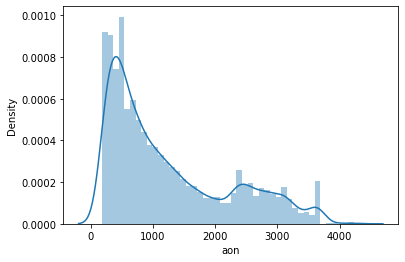

In [49]:
sns.distplot(data_hvc[data_hvc['churn'] == 0]['aon'])
plt.show()

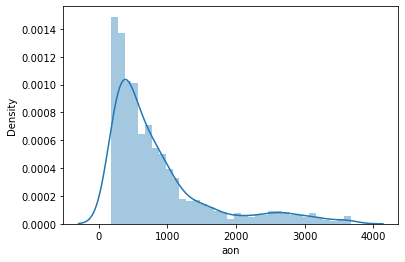

In [54]:
sns.distplot(data_hvc[data_hvc['churn'] == 1]['aon'])
plt.show()

In [59]:
px.histogram(data_hvc, x='aon', color='churn', height=350, width=500)

- From the above plots, could see that more churners have less **aon** value.
- Customers who are using the network for a long term are less likely to churn

In [60]:
data_hvc['call_centre_mou'] = data_hvc[data_hvc.columns[data_hvc.columns.str.contains(".t2c.")]].sum(axis=1)

In [62]:
px.histogram(data_hvc, x='aon', y='call_centre_mou', color='churn', height=350, width=500)

- Looks like, we can infer that customers with less age on network and less calls to CustomerCare are more likely to churn
- It might be the case that, Customers are feel convinced and satisfied after call with CustomerCare and are continuing in the same network

**Steps to follow**
- Deleting unnecessary columns
- Changing dtypes to catergorical wherever necessary
- Dummy variable creation, if applicable( not required in this case)
- Handling Class imbalance
- Data Prepocessing(scaling, transformation)
- PCA
- Model builing
- Hyper parameter tuning(GridSearch CV)
- Evaluation metrics
- Second Model for Interpretation(Logistic Regression or Decision Tree)

In [63]:
data_hvc.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'total_std_ic', 'total_roam_ic', 'total_isd_ic', 'total_ic',
       'total_loc_og', 'total_std_og', 'total_roam_og', 'total_isd_og',
       'total_og', 'call_centre_mou'],
      dtype='object', length=188)

In [64]:
# dropping unnecessary columns
data_hvc.drop(['circle_id','mobile_number','avg_rech_amt_good_phase','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','max_rech_amt_8','max_rech_amt_7','max_rech_amt_6','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','max_rech_data_6','max_rech_data_7','max_rech_data_8'], axis=1, inplace=True)

In [65]:
data_hvc.head(5)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803         0.00         0.00         0.00          0.00   
1  3171.480        57.84        54.68        52.29        453.43   
2   137.362       413.69       351.03        35.08         94.66   
3   637.760       102.41       132.11        85.14        757.93   
4   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00          0.00   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         94.09        129.74             97.93            125.94   
4        133.68        182.14              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             12.01             49.89             31.76             49.14   
2             22.58             13.69             10.04             75.69   
3             61.79            665.36            808.74            876.99   
4              0.00              2.36              6.35             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [66]:
data_hvc.shape

(29953, 170)

In [67]:
data_hvc.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [68]:
data_hvc.shape

(29953, 167)

In [69]:
data_hvc['monthly_tot_data_6'] = data_hvc['monthly_2g_6'] + data_hvc['monthly_3g_6']
data_hvc['monthly_tot_data_7'] = data_hvc['monthly_2g_7'] + data_hvc['monthly_3g_7']
data_hvc['monthly_tot_data_8'] = data_hvc['monthly_2g_8'] + data_hvc['monthly_3g_8']

data_hvc['monthly_tot_data_sachet_6'] = data_hvc['sachet_2g_6'] + data_hvc['sachet_3g_6']
data_hvc['monthly_tot_data_sachet_7'] = data_hvc['sachet_2g_7'] + data_hvc['sachet_3g_7']
data_hvc['monthly_tot_data_sachet_8'] = data_hvc['sachet_2g_8'] + data_hvc['sachet_3g_8']

In [70]:
# dropping the original columns as we have the derived columns
data_hvc.drop(['monthly_2g_6','monthly_3g_6','monthly_2g_7','monthly_3g_7','monthly_2g_8','monthly_3g_8','sachet_2g_6','sachet_3g_6','sachet_2g_7','sachet_3g_7','sachet_2g_8','sachet_3g_8'], axis=1, inplace=True)

In [71]:
# changing the data type of categorical columns
data_hvc['night_pck_user_6'].astype('category')
data_hvc['night_pck_user_7'].astype('category')
data_hvc['night_pck_user_8'].astype('category')

data_hvc['fb_user_6'].astype('category')
data_hvc['fb_user_7'].astype('category')
data_hvc['fb_user_8'].astype('category')

0        1.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
29948    1.0
29949    1.0
29950    1.0
29951    1.0
29952    1.0
Name: fb_user_8, Length: 29953, dtype: category
Categories (2, float64): [0.0, 1.0]

In [72]:
data_hvc.head(5)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803         0.00         0.00         0.00          0.00   
1  3171.480        57.84        54.68        52.29        453.43   
2   137.362       413.69       351.03        35.08         94.66   
3   637.760       102.41       132.11        85.14        757.93   
4   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00          0.00   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         94.09        129.74             97.93            125.94   
4        133.68        182.14              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             12.01             49.89             31.76             49.14   
2             22.58             13.69             10.04             75.69   
3             61.79            665.36            808.74            876.99   
4              0.00              2.36              6.35             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [73]:
data_hvc.shape

(29953, 161)

# Train Test Split

In [74]:
X = data_hvc.drop(['churn'], axis=1)
y = data_hvc[['churn']]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
X_train.shape

(20967, 160)

In [78]:
y_train.shape

(20967, 1)

In [79]:
# feature scaling using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# using SMOTE technique to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_sample(X_train_scaled, y_train)

In [81]:
# checking class imbalance after SMOTE
y_train_balanced['churn'].value_counts()

1    19272
0    19272
Name: churn, dtype: int64

In [82]:
X_train_balanced.shape

(38544, 160)

In [83]:
# PCA for Dimensionality Reduction
pca = PCA(random_state=42)
pca.fit(X_train_balanced)

PCA(random_state=42)

In [84]:
pca.explained_variance_ratio_

array([1.25898537e-01, 9.14989252e-02, 6.81390159e-02, 6.63238740e-02,
       4.65670075e-02, 4.30064795e-02, 3.66047071e-02, 2.97848918e-02,
       2.87759152e-02, 2.25180155e-02, 1.99581426e-02, 1.87754745e-02,
       1.67840048e-02, 1.65959061e-02, 1.63862851e-02, 1.48322819e-02,
       1.41730012e-02, 1.36865710e-02, 1.22886149e-02, 1.21587227e-02,
       1.13958257e-02, 1.05914973e-02, 1.03843570e-02, 9.85992918e-03,
       9.68179336e-03, 9.41115820e-03, 8.38276110e-03, 8.30178670e-03,
       7.68609621e-03, 7.22392445e-03, 7.09210789e-03, 6.97640392e-03,
       6.39625847e-03, 6.05521359e-03, 5.97400428e-03, 5.83072124e-03,
       5.59863606e-03, 5.51832068e-03, 5.47674714e-03, 5.33099457e-03,
       5.22823247e-03, 4.97049400e-03, 4.55360426e-03, 4.40140755e-03,
       4.31805727e-03, 4.21292562e-03, 4.10993142e-03, 4.06304944e-03,
       3.89086003e-03, 3.85249059e-03, 3.59776580e-03, 3.28714060e-03,
       3.20769635e-03, 3.11416109e-03, 3.01700561e-03, 2.88387203e-03,
      

In [85]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

In [86]:
var_cum

array([0.12589854, 0.21739746, 0.28553648, 0.35186035, 0.39842736,
       0.44143384, 0.47803855, 0.50782344, 0.53659935, 0.55911737,
       0.57907551, 0.59785099, 0.61463499, 0.6312309 , 0.64761718,
       0.66244946, 0.67662246, 0.69030904, 0.70259765, 0.71475637,
       0.7261522 , 0.7367437 , 0.74712805, 0.75698798, 0.76666978,
       0.77608093, 0.7844637 , 0.79276548, 0.80045158, 0.8076755 ,
       0.81476761, 0.82174401, 0.82814027, 0.83419549, 0.84016949,
       0.84600021, 0.85159885, 0.85711717, 0.86259392, 0.86792491,
       0.87315314, 0.87812364, 0.88267724, 0.88707865, 0.89139671,
       0.89560963, 0.89971956, 0.90378261, 0.90767347, 0.91152596,
       0.91512373, 0.91841087, 0.92161857, 0.92473273, 0.92774973,
       0.9306336 , 0.93338381, 0.93609324, 0.93874501, 0.94129244,
       0.94375138, 0.94617282, 0.94854565, 0.95085169, 0.95312801,
       0.95539576, 0.95753166, 0.95950822, 0.96134928, 0.96313911,
       0.96483005, 0.96649075, 0.96809893, 0.96967848, 0.97124

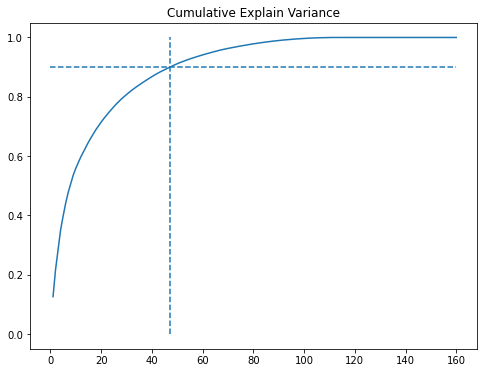

In [89]:
plt.figure(figsize=(8,6))
plt.title("Cumulative Explain Variance")
plt.plot(range(1, len(var_cum)+1), var_cum)
plt.hlines(y=0.90, xmin=0, xmax=160, linestyles='--')
plt.vlines(x=47, ymin=0, ymax=1, linestyles='--')
plt.show()

In [90]:
pca = PCA(n_components=47, random_state=42)
X_train_reduced = pca.fit_transform(X_train_balanced)
X_test_reduced = pca.transform(X_test_scaled)

In [91]:
X_train_reduced = pd.DataFrame(X_train_reduced)
X_train_reduced.head()

0         1         2         3         4         5         6   \
0 -4.295644 -1.678055  1.463637 -1.529312  5.050500 -0.423058  0.080305   
1  9.884591 -1.189922  7.824864 -0.522261  2.192237 -1.752715 -7.649326   
2  0.406409  3.726451 -3.429028 -1.889107  0.653501 -0.972137  0.680718   
3 -1.470264 -0.940830 -2.849726 -1.420925 -1.470435 -0.160428  0.009607   
4  4.625060  5.583542 -3.799475 -2.277887 -0.258048 -4.661064  2.120469   

         7         8         9         10        11        12        13  \
0 -0.484876  0.249570 -0.720321  3.899565 -0.762541 -0.020666  0.228413   
1 -3.983476  1.874016 -1.217908 -2.733698 -2.998930 -0.559256 -0.271566   
2 -1.098132 -0.475335 -2.153047 -0.736813  1.170083 -0.558849  0.016876   
3  1.660821 -0.387429  0.048927 -0.280407 -0.369193 -0.666491 -0.153195   
4 -2.454121 -0.509934  5.576507  0.577824 -0.202665  0.701560  1.618708   

         14        15        16        17        18        19        20  \
0 -0.175768  0.231945  0.523709  0.373697  0.945873  0.473006  8.094733   
1 -0.743068 -1.981747 -1.945051  0.743352 -1.219056 -1.206290  0.401357   
2 -1.579713 -1.144879 -1.218762 -0.566130 -1.934952 -0.435347 -0.183223   
3  0.489370 -0.456615 -0.388877  0.064347  0.018123  0.021173  0.565529   
4 -1.760795 -1.088430 -2.912412 -3.910287 -2.845757 -1.197320  0.623627   

         21        22        23        24        25        26        27  \
0 -0.771872 -0.688559  1.789873  0.855992  0.898803  0.975535 -1.280873   
1  1.128851 -0.104800 -2.534818  0.743309 -4.339983  2.180808 -0.021423   
2 -0.740645 -0.163308  1.296892  0.187823  1.563511 -0.102652  0.164769   
3  0.113496  0.873800  0.223247 -0.891981 -0.000546  0.535455  0.588205   
4 -0.509611  0.071121  0.615456 -1.341416  1.398813 -1.161230  0.057930   

         28        29        30        31        32        33        34  \
0  0.586903 -0.851169 -0.866323  1.120200  0.035380  0.186675 -0.376241   
1 -2.732030  0.657990  1.359300 -0.775176 -3.881430  1.050612 -0.792930   
2  1.521105  0.344374 -1.294916 -0.061895 -0.920923 -0.436616  1.441351   
3 -2.025946 -0.649612  0.729672 -0.543771  0.285178  0.243636  0.008959   
4  2.488543 -0.300970  0.094671  0.661115  1.683796  2.007729 -3.071539   

         35        36        37        38        39        40        41  \
0  1.389192 -0.838183  0.279910 -0.099388  0.112828  1.057987  0.221561   
1  0.030286  0.303670  1.606219 -0.956071 -0.753331  0.826285  0.090773   
2  1.166106 -0.198141 -0.047286  0.003870  0.405672  0.645019  1.080641   
3 -0.360279 -0.357970 -0.027565  0.555828 -0.086348 -1.655301 -1.018943   
4 -0.917736  1.497612  0.336892 -0.609012 -0.171302  1.451529  0.401261   

         42        43        44        45        46  
0 -0.817765 -3.294139 -3.644013  4.536012  4.669744  
1  0.823118 -0.637580 -0.039231 -0.927946  0.392001  
2 -0.265367  0.030066  0.318191 -0.209837 -0.233805  
3  1.005607  0.351555 -0.289316  0.870005  0.250642  
4  0.679319 -0.166731  0.343396  0.080596  0.361264

In [92]:
X_test_reduced = pd.DataFrame(X_test_reduced)
X_test_reduced.head()

0          1         2         3         4         5         6   \
0  2.028025   0.599140 -0.426004  0.731820 -0.426459  6.163990 -2.281656   
1  2.468329  13.850186  0.281772  0.282523 -1.630474 -4.014188  1.240277   
2 -5.102713  -1.882448  0.900785 -0.995770  4.293431 -0.333012  0.504816   
3 -3.598572  -1.777874  0.152074 -1.491515  3.135417 -0.133542  0.603758   
4 -1.864451   2.678578 -0.176336  0.631760  1.517593 -1.289937 -0.618153   

         7         8         9         10        11        12        13  \
0  1.273249  0.211138  0.560469 -0.019600  2.158028 -0.283712  0.321630   
1 -2.335763 -1.071355  4.648109 -0.043236 -1.819368 -0.640560 -0.719655   
2 -0.108226  0.901384  0.555926 -0.615554  0.062311 -0.749217 -0.434000   
3  0.423906  0.207682 -0.380694  0.543272  0.167937 -1.042953 -0.464071   
4 -0.367521  0.175920  0.093756  0.751173  0.361734 -0.261442 -1.301725   

         14        15        16        17        18        19        20  \
0  0.677864  0.320121  0.014725 -0.430686  0.605388  1.294686  0.567498   
1 -0.925103 -1.364672 -2.451237 -2.574052 -3.029250 -1.394287 -0.185593   
2  1.220757  1.214361  0.440170 -1.034715 -0.194339  0.048583  0.053344   
3  0.669116 -0.400510 -0.219410  0.216075  0.005347 -0.004384 -0.448018   
4  0.172809  0.461434 -0.172572  0.871749 -0.056733  0.219255  0.085081   

         21        22        23        24        25        26        27  \
0  0.654541  2.348622 -1.274944 -1.696276 -0.577928  0.910227  0.323632   
1 -1.816323  0.069869  1.417084  0.638863  1.923301 -2.393910 -0.419334   
2  0.320962  0.075336  1.339862 -0.683236 -0.848052  0.107150 -0.174113   
3 -0.115791 -0.088107 -0.218067  0.278387  0.047048  0.514778 -0.204068   
4 -1.031276  0.271199 -0.425321 -0.361104 -0.657637 -0.135382 -0.313963   

         28        29        30        31        32        33        34  \
0  1.346993 -0.049386  0.196131 -0.134442  2.112367 -0.548538 -0.027372   
1  3.690224 -0.244203 -0.286057  0.156213  1.230184  0.677221 -2.729918   
2  0.021100 -0.095324  0.253085 -0.308277  0.198042  0.122118 -0.164155   
3  0.166792 -0.666394 -0.636754 -0.373070 -0.771706 -0.694870 -0.337420   
4  0.699111 -0.085278 -0.082687 -0.733439 -0.118008 -0.000960  0.279190   

         35        36        37        38        39        40        41  \
0 -0.144532  0.691114  0.554232 -0.545561  0.766378 -0.340952  0.488984   
1 -1.523634  1.422653  0.604376 -1.462071  0.710843  3.468390 -0.252548   
2  0.268729 -0.965471  0.107573 -0.157122  0.851500  0.626478 -1.420352   
3 -0.017965  0.301457  0.214878  0.058916 -0.723819 -0.234720  0.733504   
4 -1.912442 -0.554477  0.361953 -0.398740  0.445567  0.053740  1.331719   

         42        43        44        45        46  
0  0.228727  0.161414  0.077136 -0.034985 -0.167452  
1 -0.669950  0.422164 -0.006033 -0.297676  0.207124  
2  0.216695  0.262328 -0.487216 -0.415371  0.074722  
3 -0.393256 -0.085101  0.334362 -0.042276 -0.286986  
4 -0.912206  0.156003  0.313262  0.016677 -0.309267

## 1. Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

In [100]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=42, oob_score=True)
rf.fit(X_train_reduced, y_train_balanced)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [101]:
rf.oob_score_

0.7640359070153591

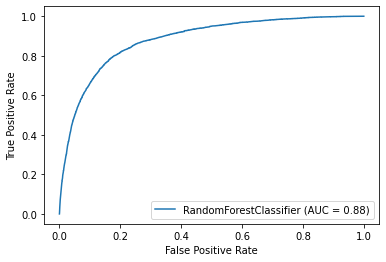

In [102]:
plot_roc_curve(rf, X_train_reduced, y_train_balanced)
plt.show()

In [103]:
# Hyper Parameter tuning for Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [104]:
params = {
    'max_depth': [2,3,5,10,15,20,25,30],
    'min_samples_leaf': [5,10,20,50,100,150,200,250,300],
    'n_estimators': [10,25,50,100,150,200,250,300]
}

In [105]:
scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True, needs_proba=True, needs_threshold=False)
cv = GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring=scorer)

In [106]:
cv.fit(X_train_reduced, y_train_balanced)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 21.1min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150, 200, 250,
                                              300],
                         'n_estimators': [10, 25, 50, 100, 150, 200, 250, 300]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [107]:
cv.best_score_

0.9801219883200556

In [108]:
rf_best = cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=300,
                       n_jobs=-1, random_state=42)

# 2. Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score

In [115]:
lr = LogisticRegression(random_state=42)

In [116]:
lr.fit(X_train_reduced, y_train_balanced)

LogisticRegression(random_state=42)

In [119]:
lr.coef_

array([[ 0.02306488, -0.51825288,  0.01433525,  0.08502774, -0.224243  ,
         0.09154555,  0.06772244,  0.66462156, -0.09319693,  0.07337085,
        -0.10363827,  0.08551468,  0.4061777 ,  0.08900553, -0.26445494,
         0.39087285,  0.22805434, -0.25660119, -0.07624609,  0.09116038,
        -0.1567233 , -0.2493961 , -0.11037657,  0.23012409,  0.14088212,
         0.20727575, -0.05463011,  0.2606227 , -0.57239199, -0.20545579,
         0.17589151, -0.0481968 ,  0.016394  , -0.12627295, -0.02354214,
         0.14249138,  0.0541798 , -0.08553421, -0.1066627 ,  0.10100077,
         0.21513822, -0.09896602, -0.05663189,  0.17874565,  0.31889389,
        -0.26010676,  0.01266999]])

In [120]:
predictions = lr.predict(X_test_reduced)

In [121]:
accuracy_score(predictions, y_test)

0.8278433118183841

In [126]:
recall_score(y_test, predictions)

0.8170731707317073

In [127]:
precision_score(y_test, predictions)

0.2992555831265509

In [128]:
roc_auc_score(y_test, predictions)

0.8229400771214307